In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
image_size = (48, 48)

train=tf.keras.utils.image_dataset_from_directory("train", batch_size=32, image_size=image_size,seed=10)
test=tf.keras.utils.image_dataset_from_directory("test", batch_size=32, image_size=image_size,seed=10)

class_names=train.class_names

print(class_names)

Found 24278 files belonging to 5 classes.
Found 5998 files belonging to 5 classes.
['angry', 'fearful', 'happy', 'sad', 'surprised']


In [ ]:
train_dataset = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.8 and logs.get('accuracy')>0.8):
      print("\nvalidation accuracy is > 80%!")
      self.model.stop_training = True

callback = Callback()

In [ ]:
X_SIZE = image_size[0]
Y_SIZE = image_size[1]
NUM_OF_CLASSES = len(class_names)

callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = tf.keras.models.Sequential([
     tf.keras.applications.ResNet50V2(include_top=False, pooling='max', weights="imagenet", input_shape= (X_SIZE,Y_SIZE,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(NUM_OF_CLASSES, activation='softmax')
  ])

model.layers[0].trainable = True

model.compile(  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                      

In [ ]:
history = model.fit(train_dataset,batch_size = 10, epochs=100, validation_data=valid_dataset, callbacks=[callback,callback2])

Epoch 1/100
759/759 [==============================] - 36s 39ms/step - loss: 1.7435 - accuracy: 0.3089 - val_loss: 9.6175 - val_accuracy: 0.3024
Epoch 2/100
759/759 [==============================] - 28s 37ms/step - loss: 1.3610 - accuracy: 0.4256 - val_loss: 2.5073 - val_accuracy: 0.3193
Epoch 3/100
759/759 [==============================] - 28s 37ms/step - loss: 1.2747 - accuracy: 0.4595 - val_loss: 1.9632 - val_accuracy: 0.4318
Epoch 4/100
759/759 [==============================] - 29s 38ms/step - loss: 1.2382 - accuracy: 0.4732 - val_loss: 6.8970 - val_accuracy: 0.4863
Epoch 5/100
759/759 [==============================] - 29s 38ms/step - loss: 1.2211 - accuracy: 0.4789 - val_loss: 1.4777 - val_accuracy: 0.4698
Epoch 6/100
759/759 [==============================] - 29s 38ms/step - loss: 1.2174 - accuracy: 0.4838 - val_loss: 1.4907 - val_accuracy: 0.3956
Epoch 7/100
759/759 [==============================] - 29s 38ms/step - loss: 1.1968 - accuracy: 0.4887 - val_loss: 5745.7524 - val

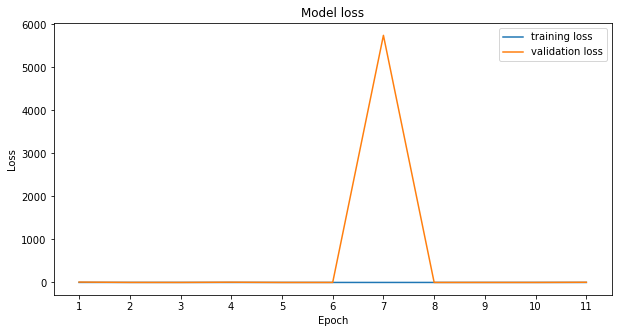

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))
plt.legend()
plt.show()

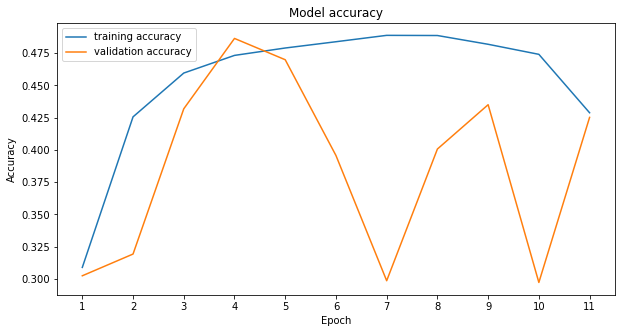

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label = "training accuracy")
plt.plot(history.history['val_accuracy'], label = "validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))
plt.legend()
plt.show()